# 01-4. File Input Linear Regrssion

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
score = np.loadtxt('data/data-01-test-score.csv',
                   delimiter=',',
                   dtype=np.float32)   # 실수형 (소수 7번째 자리까지)

In [3]:
x_data = score[:, 0:-1]  # 마지막 항목(기말고사 점수)만 제외하고 IV에 저장
y_data = score[:, [-1]]

In [4]:
print(x_data.shape)
print(y_data.shape)

(25, 3)
(25, 1)


In [5]:
# 01-3에 있는 코드 그대로 작성
# 예측 모델의 신경망 구성
tf.model = tf.keras.Sequential()

In [6]:
# 레이어 구성
tf.model.add(tf.keras.layers.Dense(
    units = 1,       # 출력값의 개수
    input_dim = 3)    # 입력값의 개수
)
# add() method로 구성하는 방법도 있음
tf.model.add(tf.keras.layers.Activation('linear'))

# 01-2 참고)
# tf.model.add(tf.keras.layers.Dense(units=1, input_dim=1, activation='linear'))

In [7]:
# 값이 발산하지 않도록 learning-rate 변경
# 현재 모델에 compile 함수로 학습시에 필요한 정보들 추가 
tf.model.compile(loss='mse',      # 비용(|손실) 함수
                optimizer=tf.keras.optimizers.SGD(learning_rate=1e-5)
                )
tf.model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 4         
_________________________________________________________________
activation (Activation)      (None, 1)                 0         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [8]:
# 모델학습 (손실값(loss)을 시각화하기 위해 변수에 저장)
loss = tf.model.fit(x_data,
                    y_data,
                    epochs=200    # 몇 번의 반복학습을 시킬건지 지정
                    )
# 아래 학습하는 과정에서 출력된 loss 값은 mse를 통해 계산된 값

Epoch 1/200
1/1 [==============================] - 0s 1ms/step - loss: 35737.3516
Epoch 2/200
1/1 [==============================] - 0s 0s/step - loss: 13219.0088
Epoch 3/200
1/1 [==============================] - 0s 997us/step - loss: 4893.3501
Epoch 4/200
1/1 [==============================] - 0s 0s/step - loss: 1815.1232
Epoch 5/200
1/1 [==============================] - 0s 997us/step - loss: 677.0170
Epoch 6/200
1/1 [==============================] - 0s 997us/step - loss: 256.2260
Epoch 7/200
1/1 [==============================] - 0s 997us/step - loss: 100.6462
Epoch 8/200
1/1 [==============================] - 0s 0s/step - loss: 43.1231
Epoch 9/200
1/1 [==============================] - 0s 997us/step - loss: 21.8538
Epoch 10/200
1/1 [==============================] - 0s 997us/step - loss: 13.9889
Epoch 11/200
1/1 [==============================] - 0s 997us/step - loss: 11.0797
Epoch 12/200
1/1 [==============================] - 0s 997us/step - loss: 10.0028
Epoch 13/200
1/1 [=====

1/1 [==============================] - 0s 0s/step - loss: 9.1973
Epoch 105/200
1/1 [==============================] - 0s 0s/step - loss: 9.1955
Epoch 106/200
1/1 [==============================] - 0s 1ms/step - loss: 9.1937
Epoch 107/200
1/1 [==============================] - 0s 1ms/step - loss: 9.1918
Epoch 108/200
1/1 [==============================] - 0s 1ms/step - loss: 9.1900
Epoch 109/200
1/1 [==============================] - 0s 0s/step - loss: 9.1881
Epoch 110/200
1/1 [==============================] - 0s 0s/step - loss: 9.1863
Epoch 111/200
1/1 [==============================] - 0s 1ms/step - loss: 9.1845
Epoch 112/200
1/1 [==============================] - 0s 1ms/step - loss: 9.1826
Epoch 113/200
1/1 [==============================] - 0s 0s/step - loss: 9.1808
Epoch 114/200
1/1 [==============================] - 0s 0s/step - loss: 9.1790
Epoch 115/200
1/1 [==============================] - 0s 1ms/step - loss: 9.1771
Epoch 116/200
1/1 [==============================] - 0s 0s/s

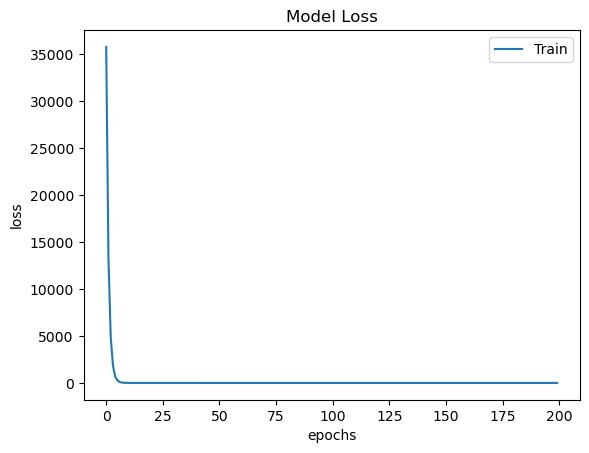

In [9]:
# 손실값(loss.history)의 변화를 시각화
plt.plot(loss.history['loss'])
plt.title("Model Loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(['Train'], loc='upper right')

In [10]:
# 최종 다중 회귀분석 예측모델 
weights = tf.model.layers[0].get_weights()
weights
# [0.9187013], [0.30915576], [0.09161894]

# 최종 모델
# H(x1, x2, x3) = 0.9187013*x1 + 0.30915576*x2 + 0.09161894*x3 + 0.00322388

[array([[0.70888776],
        [0.4707384 ],
        [0.842246  ]], dtype=float32),
 array([0.00939233], dtype=float32)]